In [ ]:
!git clone https://github.com/gotec/git2net-tutorials
import os
os.chdir('git2net-tutorials')
!pip install -r requirements.txt
os.chdir('..')
!git clone https://github.com/gotec/git2net git2net4analysis

In [17]:
# Analyse cloned repo

import git2net
import os
import sqlite3
from collections import Counter
import pandas as pd
from collections import defaultdict
import pathpy as pp

db_filename = 'git2net4analysis.db'

def mine_cloned_repo(repo_folder, repo_db):
    # We assume a clone of git2net's repository exists in the folder below following the first tutorial.
    git_repo_dir = repo_folder

    # Here, we specify the database in which we will store the results of the mining process.
    sqlite_db_file = repo_db

    # Remove database if exists
    if os.path.exists(sqlite_db_file):
        os.remove(sqlite_db_file)

    git2net.mine_git_repo(git_repo_dir, sqlite_db_file)

# mine_cloned_repo('git2net4analysis', 'git2net4analysis.db')


In [18]:
# disambiguate author aliases
def disambiguate_aliases(db_filename):
    git2net.disambiguate_aliases_db(db_filename)

    with sqlite3.connect(db_filename) as con:
        authors = pd.read_sql("""SELECT author_name, author_email, author_id FROM commits""", con)

    Counter(['{} --- {}, <{}>'.format(row.author_id, row.author_name, row.author_email)
             for idx, row in authors.iterrows()])

disambiguate_aliases(db_filename)

author identity disambiguation: 100%|██████████| 66/66 [00:00<00:00, 11915.12it/s]


A co-editing network represents the collaboration relationships between contributors based on their interactions in the project, such as code commits or file changes.

In both the temporal and aggregated network, a node represents an author, whereas edges point from the person changing a line of code to the person who was the original author.

In [19]:
# The function returns a pathpy temporal network object and two dictionaries containing properties of nodes and edges.
# dictionaries are not implemented yet

def make_coediting_net(db_filename):
    t, node_info, edge_info = git2net.get_bipartite_network(db_filename)
    n = pp.Network.from_temporal_network(t)
    return (n, node_info, edge_info)

n, node_info, edge_info = make_coediting_net(db_filename)

# res.adjacency_matrix() # it works only after using func from_temporal_network


In [20]:
colour_map = {'author': '#73D2DE', 'file': '#2E5EAA'}
node_color = {node: colour_map[node_info['class'][node]] for node in n.nodes}
pp.visualisation.plot(n, node_color=node_color)

In [21]:
# node_info['class']

In [22]:
# for node in n.nodes:
#     print(node , '\n\n')

In [23]:

colour_map = {'author': '#73D2DE', 'file': '#2E5EAA'}
node_color = {node: colour_map[node_info['class'][node]] for node in n.nodes}
pp.visualisation.plot(n, node_color=node_color)



In [24]:
print(dict(n.edges))

{(3, 'test.py'): {'weight': 4.0}, (3, 'pyce.py'): {'weight': 3.0}, (3, 'ignore'): {'weight': 1.0}, (2, 'pyce.py'): {'weight': 8.0}, (2, 'ignore'): {'weight': 2.0}, (3, 'anonymize.py'): {'weight': 2.0}, (2, 'git2net.py'): {'weight': 59.0}, (2, '.gitignore'): {'weight': 11.0}, (2, 'test_visualisation.py'): {'weight': 2.0}, (2, 'test_extract_coedits.py'): {'weight': 1.0}, (2, 'test_git2net.py'): {'weight': 10.0}, (2, 'test_identify_edits.py'): {'weight': 1.0}, (2, 'test_extract_edits.py'): {'weight': 2.0}, (2, 'test_extract_editing_paths.py'): {'weight': 7.0}, (2, 'test_get_original_line_number.py'): {'weight': 6.0}, (2, 'get_previous_names.py'): {'weight': 2.0}, (2, 'test_get_unified_changes.py'): {'weight': 1.0}, (2, 'test_identify_file_renaming.py'): {'weight': 1.0}, (2, 'test_get_path_to_origin.py'): {'weight': 2.0}, (2, 'test_get_paths_to_origin.py'): {'weight': 2.0}, (2, 'get_original_line_number.md'): {'weight': 2.0}, (2, 'README.md'): {'weight': 20.0}, (2, '__init__.py'): {'weight

In [25]:
print(dict(n.nodes))

{3: {'inweight': 0.0, 'outweight': 10.0, 'indegree': 0, 'outdegree': 4}, 'test.py': {'inweight': 4.0, 'outweight': 0.0, 'indegree': 1, 'outdegree': 0}, 'pyce.py': {'inweight': 11.0, 'outweight': 0.0, 'indegree': 2, 'outdegree': 0}, 'ignore': {'inweight': 3.0, 'outweight': 0.0, 'indegree': 2, 'outdegree': 0}, 2: {'inweight': 0.0, 'outweight': 497.0, 'indegree': 0, 'outdegree': 72}, 'anonymize.py': {'inweight': 4.0, 'outweight': 0.0, 'indegree': 2, 'outdegree': 0}, 'git2net.py': {'inweight': 59.0, 'outweight': 0.0, 'indegree': 1, 'outdegree': 0}, '.gitignore': {'inweight': 11.0, 'outweight': 0.0, 'indegree': 1, 'outdegree': 0}, 'test_visualisation.py': {'inweight': 2.0, 'outweight': 0.0, 'indegree': 1, 'outdegree': 0}, 'test_extract_coedits.py': {'inweight': 1.0, 'outweight': 0.0, 'indegree': 1, 'outdegree': 0}, 'test_git2net.py': {'inweight': 10.0, 'outweight': 0.0, 'indegree': 1, 'outdegree': 0}, 'test_identify_edits.py': {'inweight': 1.0, 'outweight': 0.0, 'indegree': 1, 'outdegree': 

In [26]:
# Artificial arrays

# my_edges = "{(3, 'test.py'): {'weight': 4.0}, (3, 'pyce.py'): {'weight': 3.0}, (3, 'ignore'): {'weight': 1.0}, (2, 'pyce.py'): {'weight': 8.0}, (2, 'ignore'): {'weight': 2.0}, (3, 'anonymize.py'): {'weight': 2.0}, (2, 'git2net.py'): {'weight': 59.0}}"
# print(my_edges)
# my_nodes = "{3: {'inweight': 0.0, 'outweight': 10.0, 'indegree': 0, 'outdegree': 4}, 'test.py': {'inweight': 4.0, 'outweight': 0.0, 'indegree': 1, 'outdegree': 0}}"
# print(my_nodes)

In [27]:
i = 0
for key in n.nodes.keys():
    if type(key) == int:
        i+=1
        
print('there are %d authors' %i)

there are 10 authors


In [28]:
n.nodes
n.edges

from collections import defaultdict
from webweb import Web

nodes_data = defaultdict(dict, n.nodes)
edges_data = defaultdict(dict, n.edges)

# Convert edges_data to list of edge pairs
edge_list = [list(k) for k in edges_data.keys()]


# Define node emotions based on your conditions
node_emotions = {}
for node in nodes_data.keys():
    if isinstance(node, int):
        node_emotions[node] = 'angry' # Author
    elif isinstance(node, str):
        node_emotions[node] = 'happy' # File

# Create display object with metadata for nodes
display = {
    'metadata': {
        'emotion': {
            'values': [node_emotions[node] for node in nodes_data.keys()]
        }
    },
    'nodes' : {
        'labels' : list(nodes_data.keys()),
        'color' : {
            'attribute' : 'emotion'
        },
    },
}

# Create web object
web = Web(edge_list, display=display)

# use the 'emotion' attribute to color nodes
web.display.colorBy = 'emotion'

# show the visualization
web.show()

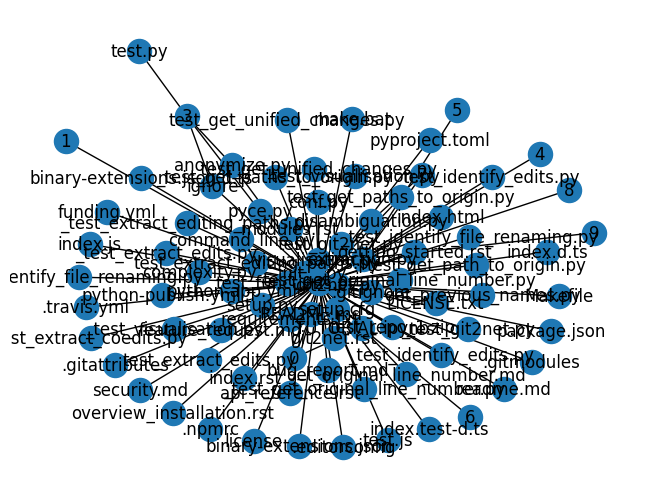

In [29]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

# assuming n is your network object
nodes_data = defaultdict(dict, n.nodes)
edges_data = defaultdict(dict, n.edges)

# Create a new graph
G = nx.Graph()

# Add nodes to the graph
for node, attr in nodes_data.items():
    G.add_node(node, **attr)

# Add edges to the graph
for edge, attr in edges_data.items():
    G.add_edge(*edge, **attr)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

In [30]:
import networkx as nx
from plotly import graph_objects as go

# Convert the strings back to dictionaries
nodes = n.nodes
edges = n.edges

# Create the graph
G = nx.Graph()

# Add nodes and edges to the graph
for node, attr in nodes.items():
    G.add_node(node, **attr)

for edge, attr in edges.items():
    G.add_edge(*edge, **attr)

# Get positions for the nodes in G
pos = nx.spring_layout(G)

# Create Edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Create Nodes
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

# Color Node Points
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color'] += tuple([len(adjacencies[1])])
    node_info = 'Name: ' + str(adjacencies[0]) + '<br># of connections: ' + str(len(adjacencies[1]))
    node_trace['text'] += tuple([node_info])

# Create Network Graph
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()